In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Importing the Libraries

In [3]:
import os
import random 
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import cv2
from tensorflow.keras import utils #to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import random
import seaborn as sns

# Creating Constants

In [4]:
# Creating Constants

FAST_RUN = True
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

# Preparing Training Data 

In [5]:
# PREPARING THE DATA FOR TRAINING
filenames = os.listdir(r'C:\Cat_Dog_Classifiyer\train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    print(category)
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)


cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog


In [6]:
filenames

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.101.jpg',
 'cat.102.jpg',
 'cat.103.jpg',
 'cat.104.jpg',
 'cat.105.jpg',
 'cat.106.jpg',
 'cat.107.jpg',
 'cat.108.jpg',
 'cat.109.jpg',
 'cat.11.jpg',
 'cat.110.jpg',
 'cat.111.jpg',
 'cat.112.jpg',
 'cat.113.jpg',
 'cat.114.jpg',
 'cat.115.jpg',
 'cat.116.jpg',
 'cat.117.jpg',
 'cat.118.jpg',
 'cat.119.jpg',
 'cat.12.jpg',
 'cat.120.jpg',
 'cat.121.jpg',
 'cat.122.jpg',
 'cat.123.jpg',
 'cat.124.jpg',
 'cat.125.jpg',
 'cat.126.jpg',
 'cat.127.jpg',
 'cat.128.jpg',
 'cat.129.jpg',
 'cat.13.jpg',
 'cat.130.jpg',
 'cat.131.jpg',
 'cat.132.jpg',
 'cat.133.jpg',
 'cat.134.jpg',
 'cat.135.jpg',
 'cat.136.jpg',
 'cat.137.jpg',
 'cat.138.jpg',
 'cat.139.jpg',
 'cat.14.jpg',
 'cat.140.jpg',
 'cat.141.jpg',
 'cat.142.jpg',
 'cat.143.jpg',
 'cat.144.jpg',
 'cat.145.jpg',
 'cat.146.jpg',
 'cat.147.jpg',
 'cat.148.jpg',
 'cat.149.jpg',
 'cat.15.jpg',
 'cat.150.jpg',
 'cat.151.jpg',
 'cat.152.jpg',
 'cat.153.jpg',
 'cat.154.jpg',
 '

Creating a new DataFrame of the training dataset.

In [7]:
df_new = pd.DataFrame({
    'filenames': filenames,
    'category': categories
})

In [8]:
df_new

,filenames,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0
...,...,...
397,dog.95.jpg,1
398,dog.96.jpg,1
399,dog.97.jpg,1
400,dog.98.jpg,1


Visualizing the number of cats and dogs in the training dataset.

<Axes: >

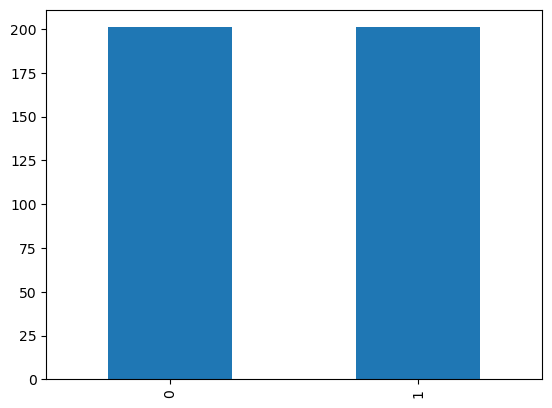

In [9]:
df_new['category'].value_counts().plot.bar()

Checking the Sample from the prepared training dataset.

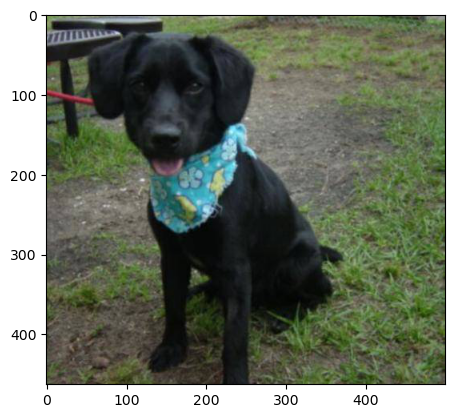

In [10]:
# checking the sample 
sam_img = random.choice(filenames)

image = load_img(r'C:\Cat_Dog_Classifiyer\train\\'+sam_img)

plt.imshow(image)

# Creating the Model

Importing sequential models and Cov2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization layers.
Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
Conv Layer: This layer will extract features from image.
Pooling Layer: This layerreduce the spatial volume of input image after convolution.
Fully Connected Layer: It connect the network from a layer to another layer
Output Layer: It is the predicted values layer.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

          
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model.summary()

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

# Creating Callbacks

In [12]:
#creating callbacks

#EarlyStop

earlystop = EarlyStopping(monitor = 'val_accuracy', patience = 10)

# reduce_LR
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, varbose = 1, factor = 0.5, min_lr = 0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [13]:
df_new.head()

,filenames,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


# Preparing Data

In [14]:
df_new['category'] = df_new['category'].replace({0:'cat', 1:'dog'})

In [15]:
train_df, validate_df = train_test_split(df_new, test_size = 0.20, random_state = 42)

train_df

,filenames,category
18,cat.114.jpg,cat
203,dog.10.jpg,dog
351,dog.53.jpg,dog
275,dog.165.jpg,dog
63,cat.155.jpg,cat
...,...,...
71,cat.162.jpg,cat
106,cat.194.jpg,cat
270,dog.160.jpg,dog
348,dog.50.jpg,dog


In [16]:
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

validate_df

,filenames,category
0,dog.174.jpg,dog
1,dog.170.jpg,dog
2,cat.128.jpg,cat
3,dog.107.jpg,dog
4,cat.182.jpg,cat
...,...,...
76,dog.122.jpg,dog
77,dog.71.jpg,dog
78,cat.77.jpg,cat
79,dog.162.jpg,dog


In [17]:
train_df.shape

(321, 2)

In [18]:
validate_df.shape

(81, 2)

In [19]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

batch_size = 15

# Training Image Generator

In [20]:
# Creating Data Generator to help create various variations of a training image data set to improve the learning accuracy of the machine

#Training Image Generator

train_gen = ImageDataGenerator(
    rotation_range = 25,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1, 
    height_shift_range = 0.1)
train_generator = train_gen.flow_from_dataframe(
    train_df,
    "C:\\Cat_Dog_Classifiyer\\train\\",
    x_col = 'filenames',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size)


Found 321 validated image filenames belonging to 2 classes.


# Validation Image Generator

In [21]:
validation_gen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_gen.flow_from_dataframe(
    validate_df,
    "C:\\Cat_Dog_Classifiyer\\train\\",
    x_col='filenames',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 81 validated image filenames belonging to 2 classes.


In [22]:
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_gen.flow_from_dataframe(train_df,
                                                  "C:\\Cat_Dog_Classifiyer\\test\\", x_col='filenames',y_col='category',
                                                 target_size=IMAGE_SIZE,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 155 validated image filenames belonging to 2 classes.


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 166 invalid image filename(s) in x_col="filenames". These filename(s) will be ignored.
  warnings.warn(


# Checking Our Generators

In [23]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_gen.flow_from_dataframe(
    example_df,
    "C:\\Cat_Dog_Classifiyer\\train\\",
    x_col='filenames',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


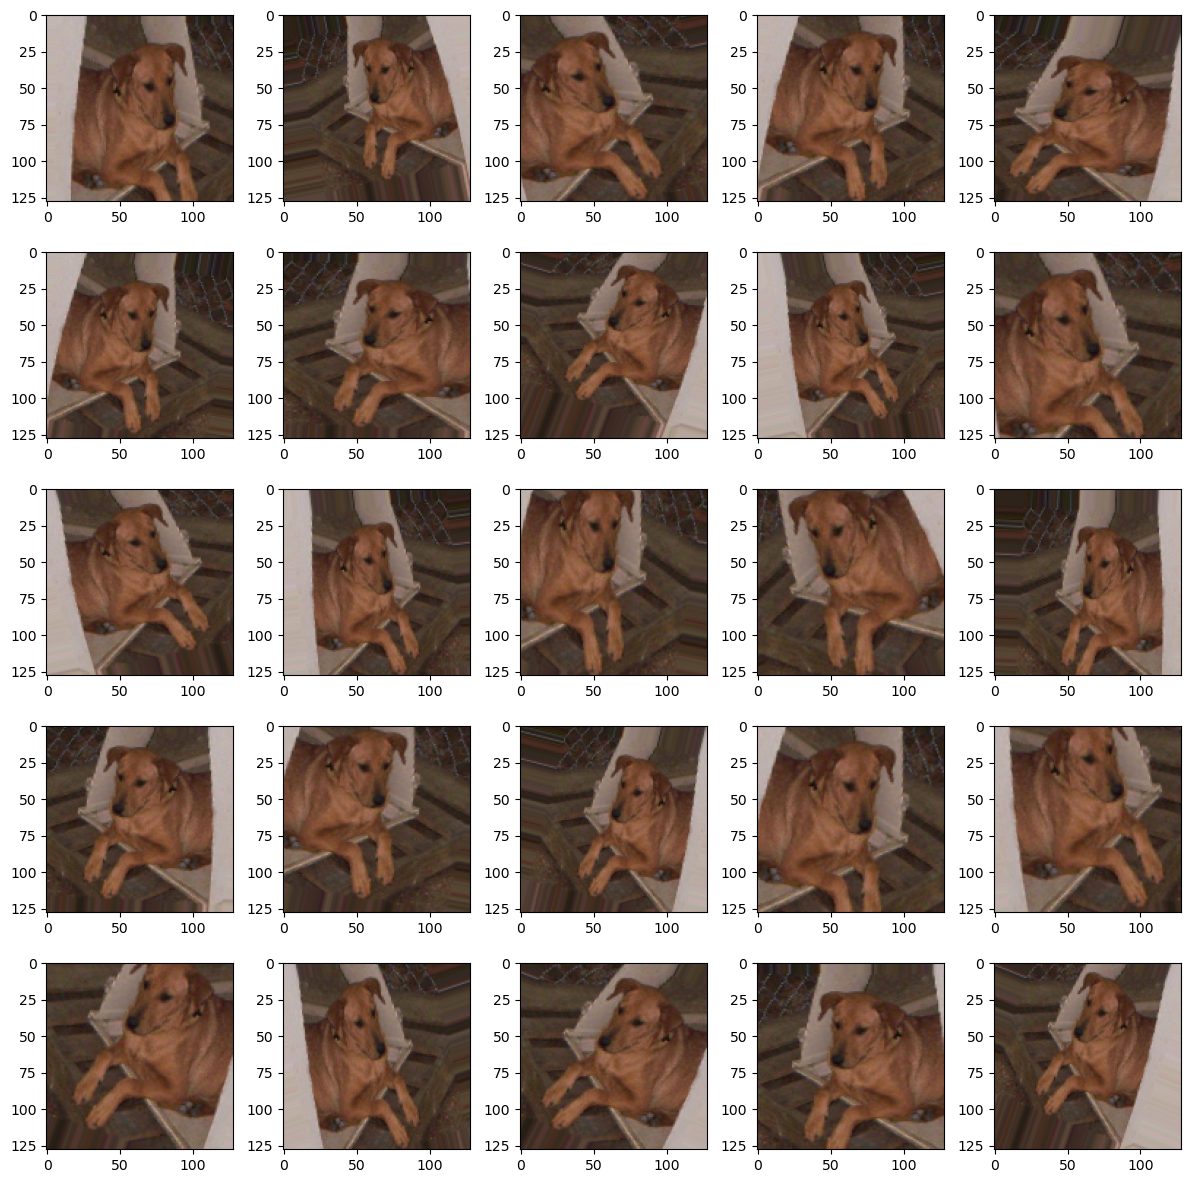

In [24]:
plt.figure(figsize=(12, 12))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fitting Our Model

In [25]:
# fit the model

epochs = 50

history = model.fit(train_generator,
                             epochs = epochs,
                             validation_data = validation_generator,
                             validation_steps = total_validate//batch_size,
                             steps_per_epoch = total_train//batch_size,
                             callbacks = callbacks)

model.save('new_model.h5')
# validate_loss, validate_accuracy = model.evaluate(validation_generator, steps=total_validate//batch_size)
# print("validate Loss:", validate_loss)
# print("validate Accuracy:", validate_accuracy)

Epoch 1/50


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 0.5379 - loss: 2.3048 - val_accuracy: 0.5733 - val_loss: 1.2685 - learning_rate: 0.0010
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.7844 - val_accuracy: 0.3333 - val_loss: 0.9353 - learning_rate: 0.0010
Epoch 3/50


C:\Users\Asus\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.5929 - loss: 1.0734 - val_accuracy: 0.5733 - val_loss: 1.4532 - learning_rate: 0.0010
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6000 - loss: 0.5442 - val_accuracy: 0.5000 - val_loss: 1.1006 - learning_rate: 5.0000e-04
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.6016 - loss: 0.8561 - val_accuracy: 0.5467 - val_loss: 3.8250 - learning_rate: 5.0000e-04
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1667 - loss: 0.5414 - val_accuracy: 0.6667 - val_loss: 1.5903 - learning_rate: 2.5000e-04
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.6473 - loss: 0.6975 - val_accuracy: 0.5467 - val_loss: 3.2100 - learning_rate: 2.5000e-04
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6000 - loss: 0.2999 - val_accuracy: 0.6667 - val_loss: 0.9850 - learning_rate: 2.5000e-04
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.6573 - loss: 0.6331

# Visualizing Our Model Accuracy

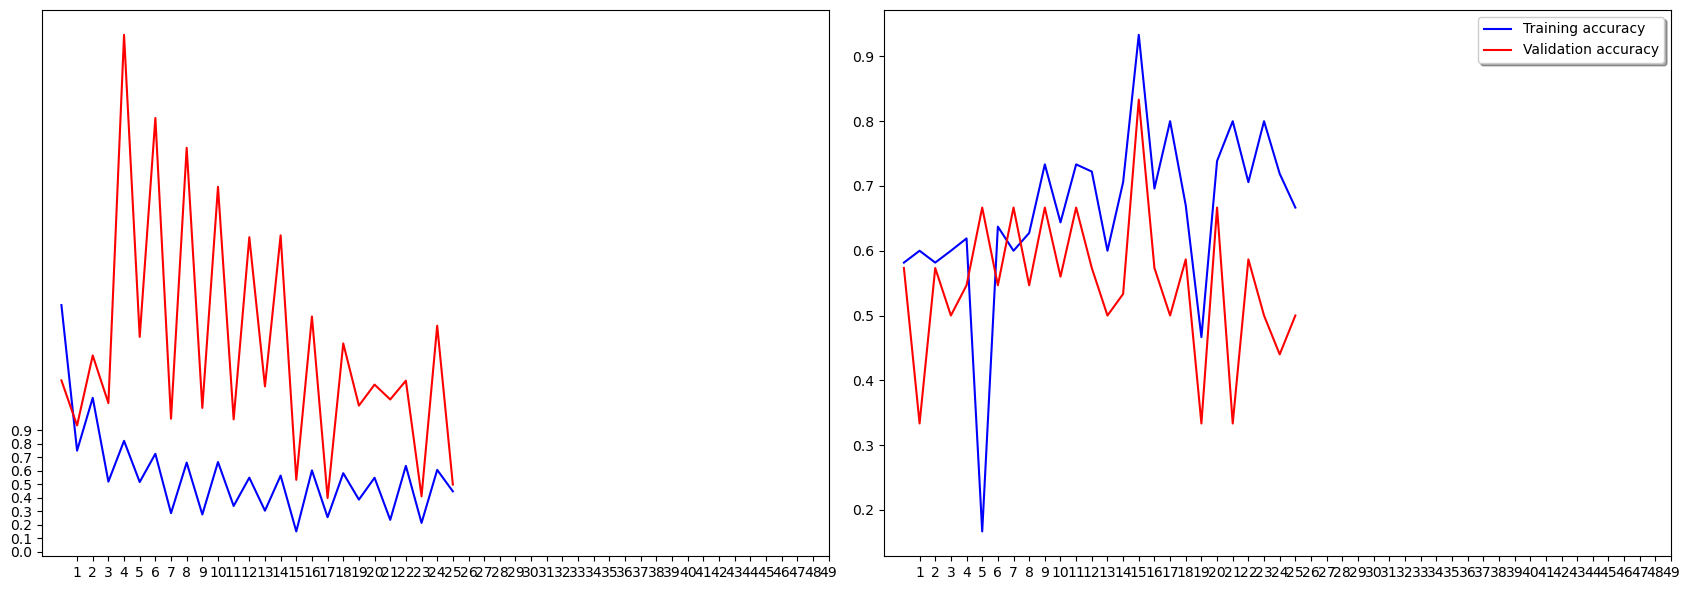

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Predicting With the Test Data 

In [ ]:
for i in range(10):
    all_test_images = os.listdir('C:\\Cat_Dog_Classifiyer\\test\\')
    random_image = random.choice(all_test_images)
    img = cv2.imread(f'C:\\Cat_Dog_Classifiyer\\test\\/{random_image}')
    img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH))

    org = img.copy()
    img = img.reshape(1,128,128,3)

    pred = model.predict(img)
    print(['cat','dog'][int(pred[0][0])])
    cv2.imshow('Live predictions',org)
    cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
dog
